In [286]:
import numpy as np
import matplotlib.pyplot as plt

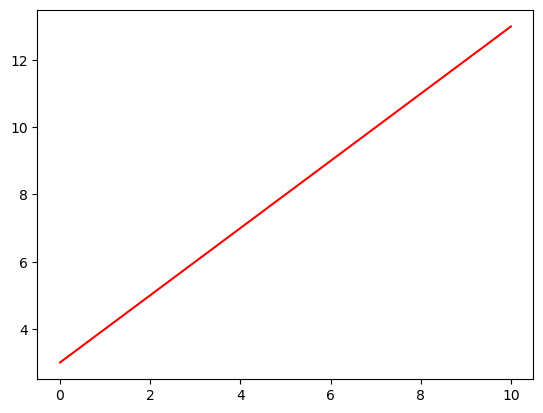

In [287]:
np.random.seed(42)
# y = ax + b | a = inclinacion, b = altura
inclinacion = 0
altura = 5

# objetivo y = 1*x + 3
plt.plot([0,10],[3,13],color='red')
plt.show()


In [288]:
def genera_datos(n):
    x = np.linspace(0, 10, n)
    y = x + 3 + np.random.randn(n)
    return x, y


In [289]:
x_array, y_array = genera_datos(30)


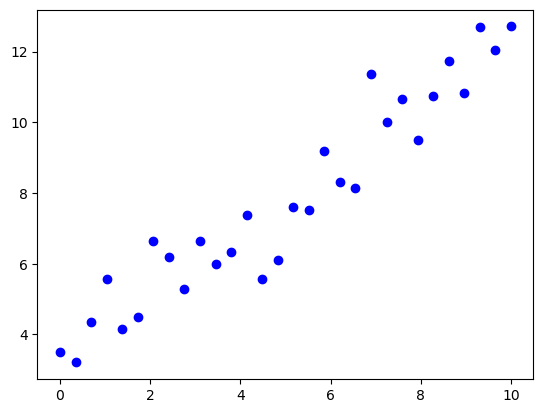

In [290]:
def conectar_puntos(array1, array2):
    for i in range(len(array1)):
        plt.plot(array1[i:i+2], array2[i:i+2], 'red')

#plt.plot([0,10],[3,13],color='grey')

plt.scatter(x_array, y_array, color='blue')
#conectar_puntos(x_array, y_array)
plt.show()

* buscar linea aleatoria

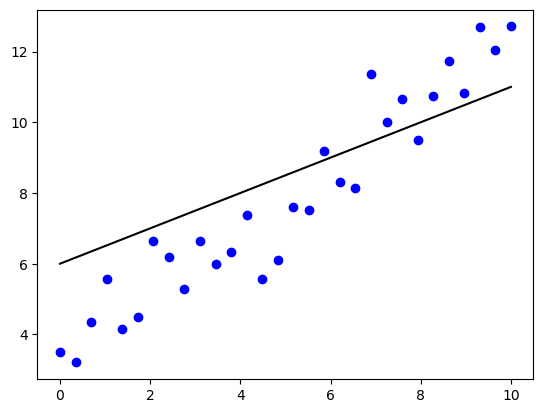

In [291]:
linea_x = [0,10]
linea_y = [6,11]
plt.plot(linea_x, linea_y, color='black')
plt.scatter(x_array, y_array, color='blue')

* Funcion para predecir la 'y' correcta para un punto de una linea

In [292]:
def predice_y(x, a, b):
    y_hat = a*x + b
    return y_hat

* Funcion de error

In [293]:
def error(linea,a,b):
    y_hat = predice_y(linea[0],a,b)
    error = y_hat - linea[1]
    return error

* Funcion de coste

In [294]:
def coste(linea,a,b):
    error2 = error(linea,a,b)
    error_cuadratico =  error2 ** 2
    coste = error_cuadratico.mean()
    return coste


5.0


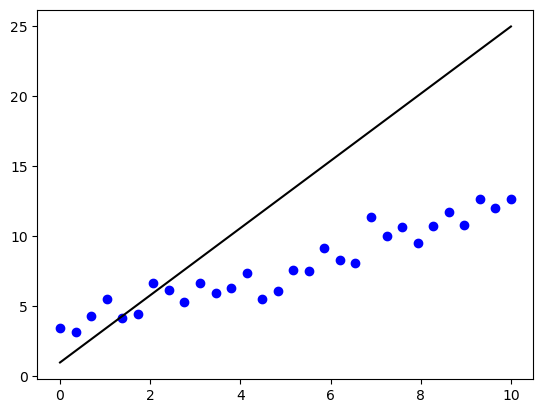

In [295]:
linea_x = np.array([0,10])
linea_y = np.array([1,25]) 
linea = [linea_x, linea_y]
a = 2
b = 2
print(coste(linea,a,b))
plt.plot(linea_x, linea_y, color='black')
plt.scatter(x_array, y_array, color='blue')

Coste: 153.1740609999989
Coste: 153.34824399994363
Coste: 153.52254899988833
Coste: 153.69697599983292
Coste: 153.87152499977742
Coste: 154.04619599972176
Coste: 154.22098899966625
Coste: 154.39590399961043
Coste: 154.57094099955464
Coste: 154.74609999949877
Coste: 154.92138099944282
Coste: 155.0967839993868
Coste: 155.27230899933062
Coste: 155.44795599927443
Coste: 155.62372499921818
Coste: 155.79961599916186
Coste: 155.97562899910545
Coste: 156.15176399904897
Coste: 156.3280209989924
Coste: 156.50439999893578
Coste: 156.68090099887905
Coste: 156.85752399882216
Coste: 157.0342689987654
Coste: 157.21113599870836
Coste: 157.38812499865134
Coste: 157.56523599859423
Coste: 157.74246899853705
Coste: 157.9198239984798
Coste: 158.09730099842238
Coste: 158.27489999836496
Coste: 158.4526209983075
Coste: 158.63046399824992
Coste: 158.80842899819228
Coste: 158.9865159981346
Coste: 159.1647249980768
Coste: 159.34305599801894
Coste: 159.521508997961
Coste: 159.70008399790285
Coste: 159.87878099784

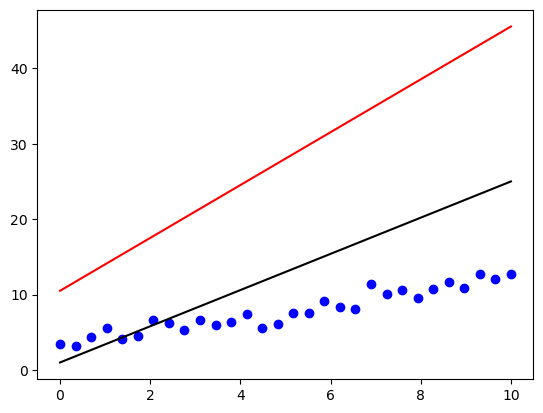

In [296]:
learning_rate = 0.001    

coste1 = 1
def derivada(n1,n2):
    n1_fin = n1 + 0.00001
    n2_fin = n2 + 0.00001
    derivada = (n2_fin-n2)/ (n1_fin-n1)
    if derivada > 1:
        derivada *= -1
    
    return derivada
a=3
b=10
costeinicial= 154
for i in range(2000):
    a  +=learning_rate * derivada(coste1, a)
    b  +=learning_rate * derivada(coste1, b)
    coste1 = coste(linea,a,b)
    print(f"Coste: {coste1}")
    if i == 1500:
        print()

print(f"a: {a}, b: {b}")
linea = predice_y(np.array([0,10]), a, b)
plt.plot([0,10],linea,color='red')
plt.plot(linea_x, linea_y, color='black')
plt.scatter(x_array, y_array, color='blue')
    